# QUESTION 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests # Page requests

from bs4 import BeautifulSoup as soup # HTML parser
import re # Regular expressions
import time # Time delays
import random # Random numbers


#header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'} 
#url = 'https://charlottesville.craigslist.org/search/cta?purveyor=owner#search=1~gallery~0~0' 
#raw = requests.get(url,headers=header) # Get page
     


### QUESTION 1
### using craigslist page with vintage toys, I plan to collect info about the types of boats on the market. EDA analysis could include
### finding the most popular buzzwords/ boat types sold, the distribution of prices, and the distribution of years
### of origin for boats sold.

In [ ]:


header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'} 
url = 'https://charlottesville.craigslist.org/search/boo#search=1~gallery~0~0' 
raw = requests.get(url,headers=header) # Get page

# QUESTION 2 -- USE BEAUTIFUL SOUP TO EXTRACT DATA

In [3]:
# QUESTION 2
# use beautiful soup to extract data

from bs4 import BeautifulSoup as soup # HTML parser
bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

import re # Regular expressions

brands = ['yamaha', "honda", "mariah", "trophy"] # collecting text data about boat types

bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

data = [] # We'll save our listings in this object
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    # Get brand from the title string:
    words = title.split()
    hits = [word for word in words if word in brands] # Find brands in the title
    if len(hits) == 0:
        brand = 'missing'
    else:
        brand = hits[0]
    # Get years from title string:
    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title ) # Find year references
    if regex_search is None: # If no hits, record year as missing value
        year = np.nan 
    else: # If hits, record year as first match
        year = regex_search.group(0)
    #
    data.append({'title':title,'price':price,'year':year,'link':link,'brand':brand})


# QUESTION 3 -- WRANGLE DATA AND CREATE EDA PLOTS

Shape: 
 (34, 6)


                                     title  price  year  \
0   wave armor drive on pwc and boat ports   2200   NaN   
1  john boat 3 trolling motors and battery    800   NaN   
2             jon boat and vee bottom boat    200   NaN   
3                 14ft jon boat crestliner   2850   NaN   
4               triton tr-175 fishing boat   6500   NaN   

                                                link    brand  age  
0  https://charlottesville.craigslist.org/boa/d/g...  missing  NaN  
1  https://charlottesville.craigslist.org/boa/d/l...  missing  NaN  
2  https://charlottesville.craigslist.org/boa/d/a...  missing  NaN  
3  https://charlottesville.craigslist.org/boa/d/d...  missing  NaN  
4  https://charlottesville.craigslist.org/boa/d/p...  missing  NaN  


We can see here that many of the boats have missing brands. Looking at the website, many of the boats were kayaks
with no brand name. I will keep them in the dataset.


count        34.000000
mean      14844.97

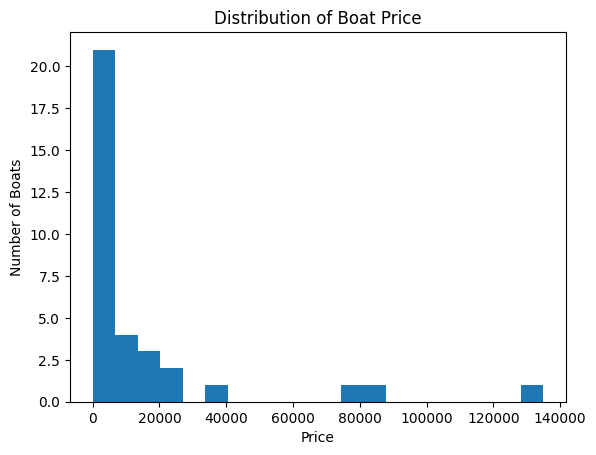



The histogram shows a large concentration of boats priced under $2,000. In the stats table, we see that median boat price is
$2,350, which reflects this. Mean boat price is much higher at ~$14,000, which reflects the presence of several outliers
in the upper price range.


In [16]:
# QUESTION 3

## Wrangle the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','', regex=False)
df['price'] = df['price'].str.replace(',','', regex=False)
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['year'] = pd.to_numeric(df['year'],errors='coerce')
df['age'] = 2025-df['year']
print("Shape: \n", df.shape)
print("\n")
print( df.head() )
print( "\n" )

print( "We can see here that many of the boats have missing brands. Looking at the website, many of the boats were kayaks")
print( "with no brand name. I will keep them in the dataset." )
print( "\n" )

# EDA for price and age:

# create stats and histogram for distribution of product price
print(df['price'].describe())
print( '\n' )
df['price'].hist(bins = 20, grid=False)
plt.xlabel('Price')
plt.ylabel('Number of Boats')
plt.title('Distribution of Boat Price')
plt.show()
print( "\n" )

print( "The histogram shows a large concentration of boats priced under $2,000. In the stats table, we see that median boat price is")
print( "$2,350, which reflects this. Mean boat price is much higher at ~$14,000, which reflects the presence of several outliers")
print( "in the upper price range.")

perform boat production year statistics: 

boat production year stats: 

count       7.000000
mean     2013.000000
std         5.887841
min      2004.000000
25%      2010.000000
50%      2011.000000
75%      2017.500000
max      2021.000000
Name: year, dtype: float64


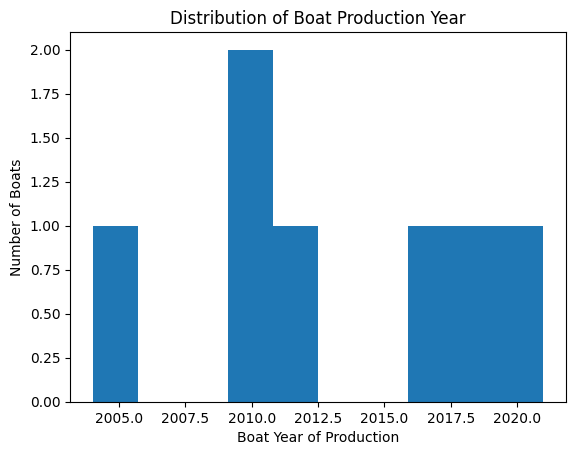

In [17]:



print( "perform boat production year statistics: \n" )
print( "boat production year stats:", "\n")
print(df['year'].describe())  # Display descriptive statistics

# create histogram for distribution of product year
df['year'].hist(bins=10, grid=False)
plt.xlabel('Boat Year of Production')
plt.ylabel('Number of Boats')
plt.title('Distribution of Boat Production Year')
plt.show()

# the scatterplot shows a lumpy distribution of boat production years, with no boats produced in the 20th century. 
# Two boats were produced in the year 2010, which is the max count for any year. The most recent boat production year is 2021.


let's look at price by brand: 

price by brand: 
         price                                                          \
        count          mean           std      min       25%      50%   
brand                                                                   
honda     1.0  14000.000000           NaN  14000.0  14000.00  14000.0   
mariah    1.0   9500.000000           NaN   9500.0   9500.00   9500.0   
missing  28.0  12740.392857  29279.295995      0.0    178.75   1149.5   
trophy    1.0  18999.000000           NaN  18999.0  18999.00  18999.0   
yamaha    3.0  35166.333333  43157.079377  10000.0  10250.00  10500.0   

                             
              75%       max  
brand                        
honda    14000.00   14000.0  
mariah    9500.00    9500.0  
missing   7874.75  134999.0  
trophy   18999.00   18999.0  
yamaha   47749.50   84999.0  


Trophy boat brand has the highest median price at $18,999. Boats with missing brand had a median price of $1149, which poss

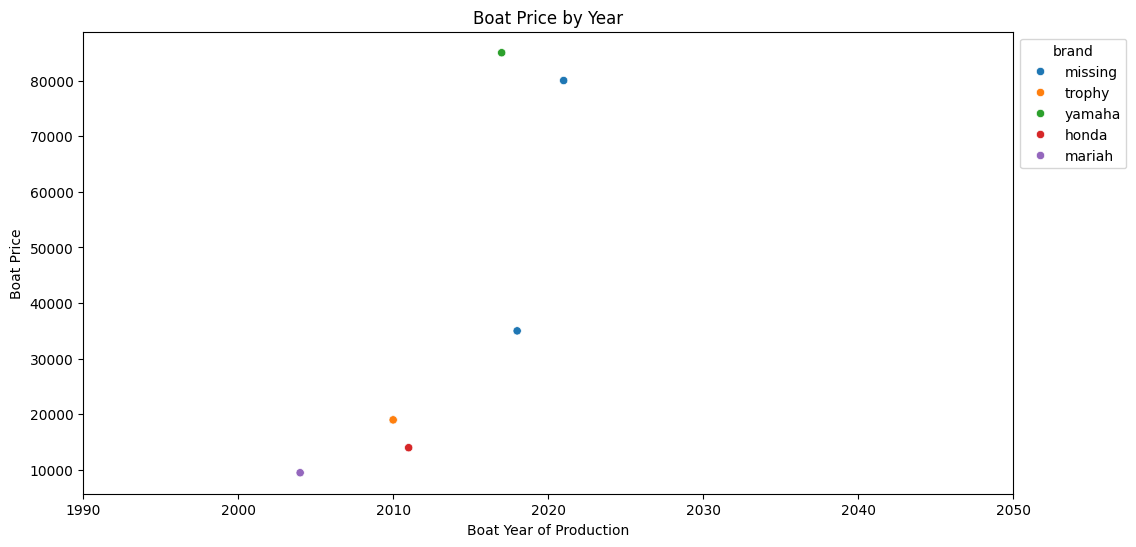

There are very few points in this graph, with only a few brands represented. However, it appears that
there is a negative correlation between the age and price of boats, regardless of brand.


In [20]:

print( "let's look at price by brand: \n")

# Price by brand chart:
print("price by brand: \n", df.loc[:,['price','brand']].groupby('brand').describe() )
print("\n")

print( "Trophy boat brand has the highest median price at $18,999. Boats with missing brand had a median price of $1149, which possibly suggests")
print( "that brand name listing is associated with higher price listing.")

# Year by brand chart:
print("year by brand: \n", df.loc[:,['year','brand']].groupby('brand').describe() )

# scatterplot: year and price by brand
plt.figure(figsize=(12, 6)) 
ax = sns.scatterplot(data=df, x='year', y='price', hue='brand')
plt.xlabel('Boat Year of Production')
plt.ylabel('Boat Price')
plt.title('Boat Price by Year')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlim(1990, 2050)  # Set x-axis range from 0 to 2050
plt.show()

print( "There are very few points in this graph, with only a few brands represented. However, it appears that")
print( "there is a negative correlation between the age and price of boats, regardless of brand.")


experiment with adding log function: 



/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


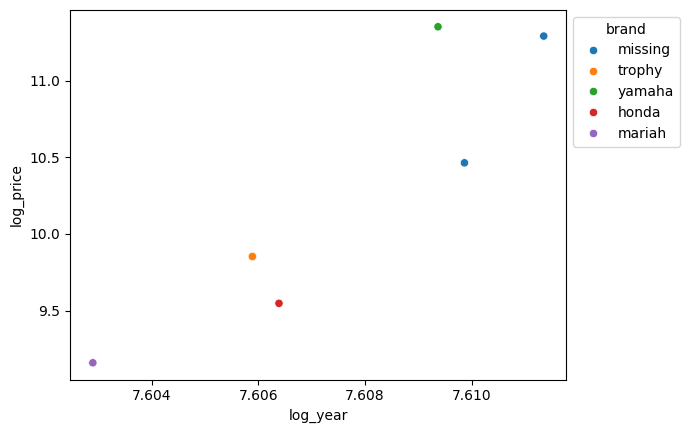


 Since the dataset is so small, it seems unnecessary to apply the log function.


In [22]:

print( "experiment with adding log function: \n")

df['log_price'] = np.log(df['price']) # apply log function to normalize the distribution / reduce impact of outliers
df['log_year'] = np.log(df['year'])

ax = sns.scatterplot(data=df, x='log_year', y='log_price',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

print( "\n Since the dataset is so small, it seems unnecessary to apply the log function." )


In [24]:

print("Covariance of price and year: \n", df.loc[:,['log_price','log_year']].cov())

print( "\n The covariance between log_age and log_price is -0.584. This indicates that as age moves positively," )
print( "price moves negatively." )

print("\n Correlation between price and year: \n", df.loc[:,['log_price','log_year']].corr())

print( " \n the correlation between price and age is -0.892. This indicates that for a 1% increase in boat age corresponds to an") 
print( "average decrease in price of 0.89%.") 


Covariance of price and year: 
            log_price  log_year
log_price   6.612781  0.002268
log_year    0.002268  0.000009

 The covariance between log_age and log_price is -0.584. This indicates that as age moves positively,
price moves negatively.

 Correlation between price and year: 
            log_price  log_year
log_price   1.000000  0.912774
log_year    0.912774  1.000000
 
 the correlation between price and age is -0.892. This indicates that for a 1% increase in boat age corresponds to an
average decrease in price of 0.89%.


create jointplot of age and price: 



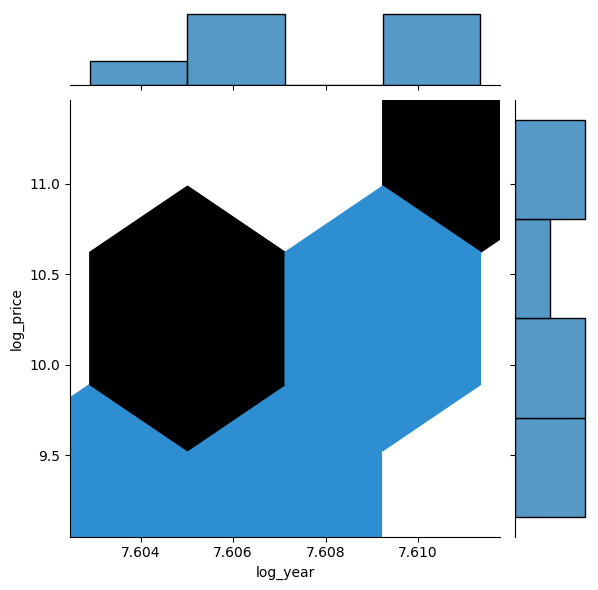

the hexogonal bins on this plot are very large and few, which indicates underfitting. It's difficult
to make any assumptions from this graph. 

create kde plot for price by brand: 



/tmp/ipykernel_722/4274970069.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df,x='price',hue='brand')


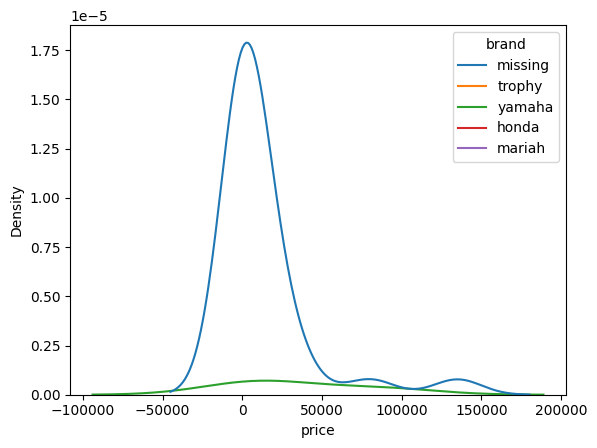

<Figure size 640x480 with 0 Axes>

In [26]:

print( "create jointplot of age and price: \n")
sns.jointplot(data=df, x='log_year', y='log_price',kind='hex')
plt.show()
plt.savefig("year_price_joint")

print( "the hexogonal bins on this plot are very large and few, which indicates underfitting. It's difficult" ) 
print( "to make any assumptions from this graph. \n" )

print( "create kde plot for price by brand: \n")
sns.kdeplot(data=df,x='price',hue='brand')
plt.show()
plt.savefig("kde_price_brand")

print( "The accuracy of this graph is once again affected by the lack of brand names. However, boats with missing brand") 
print( "name appear to follow a normal price distribution.")


In [28]:

print( " Let's test my theory that boats with missing brand name tend to have a lower listing price:" )

# create dictionary for brand / price pairs and print it out:
for index, row in df.iterrows():
    print(f"Brand: {row['brand']}, Price: {row['price']}")
print( "\n You can see here a large proportion of missing values for brand. Should refine scraping technique to get more accurate info.")


 Let's test my theory that boats with missing brand name tend to have a lower listing price:
Brand: missing, Price: 2200
Brand: missing, Price: 800
Brand: missing, Price: 200
Brand: missing, Price: 2850
Brand: missing, Price: 6500
Brand: missing, Price: 1600
Brand: missing, Price: 2500
Brand: missing, Price: 0
Brand: missing, Price: 180
Brand: missing, Price: 135
Brand: missing, Price: 170
Brand: missing, Price: 160
Brand: missing, Price: 35000
Brand: missing, Price: 79999
Brand: missing, Price: 18995
Brand: missing, Price: 134999
Brand: missing, Price: 175
Brand: missing, Price: 800
Brand: missing, Price: 999
Brand: missing, Price: 40
Brand: missing, Price: 230
Brand: missing, Price: 25000
Brand: missing, Price: 1300
Brand: missing, Price: 600
Brand: trophy, Price: 18999
Brand: missing, Price: 4300
Brand: missing, Price: 24999
Brand: yamaha, Price: 84999
Brand: missing, Price: 11999
Brand: yamaha, Price: 10500
Brand: yamaha, Price: 10000
Brand: honda, Price: 14000
Brand: missing, Pric

In [30]:

print( "\n Look at descriptive statistics tables for boats with missing brand name & compare to boats that do have a listed brand name:")
missing_brand_df = df[df['brand'] == 'missing'] # Get descriptive statistics for filtered items
stats = missing_brand_df.describe() # Print the descriptive statistics
print( "\n descriptive statistics for boats in dataset which are missing a brand name:" )
print(stats)

non_missing_brand_df = df[df['brand'] != 'missing'] # Get descriptive statistics for filtered items
stats = non_missing_brand_df.describe() # Print the descriptive statistics
print( "\n descriptive statistics for boats in data not missing brand name:" )
print(stats)

median_missing = missing_brand_df['price'].median()
median_non_missing = non_missing_brand_df['price'].median()

# Calculate the percentage difference
percentage_difference = ((median_non_missing - median_missing) / median_missing) * 100

# Print the results
print(f"\n Median price for items with missing brand: {median_missing}")
print(f"\n Median price for items without missing brand: {median_non_missing}")
print(f"\n Percentage difference: {percentage_difference:.2f}%")



 Look at descriptive statistics tables for boats with missing brand name & compare to boats that do have a listed brand name:

 descriptive statistics for boats in dataset which are missing a brand name:
               price         year        age  log_price  log_year
count      28.000000     3.000000   3.000000  28.000000  3.000000
mean    12740.392857  2016.333333   8.666667       -inf  7.609033
std     29279.295995     5.686241   5.686241        NaN  0.002822
min         0.000000  2010.000000   4.000000       -inf  7.605890
25%       178.750000  2014.000000   5.500000   5.185914  7.607876
50%      1149.500000  2018.000000   7.000000   7.038437  7.609862
75%      7874.750000  2019.500000  11.000000   8.932813  7.610605
max    134999.000000  2021.000000  15.000000  11.813023  7.611348

 descriptive statistics for boats in data not missing brand name:
              price         year        age  log_price  log_year
count      6.000000     4.000000   4.000000   6.000000  4.000000
mean

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)



### from this, we see that boats in the dataset which are missing a brand name have a median price of $999
### conversely, boats in the dataset which have brand name included have a median price of $10500
### Boats with brand names listed are priced 951% higher than brands without brands names, on average.
### this could possibly indicate that including brand name in Craiglist descriptions typically raises price
### However, potential biases include the fact that smaller boats (such as kayaks) are more likely to be listed without a brand name,
### which drives down the price median for non-brand boats.

## OVERALL FINDINGS:
### Overall, it was difficult to find consistent patterns in the data due to a lack of points in the dataset.
### However, the plots lead me to infer the following:
    
    #### age and price are negatively correlated for boats on the marketplace (according to the scatterplot), which means that
    #### people selling newer boats are more likely to price them high (this is also intutitive).

    #### Trophy boats had the highest median value at $19000, followed by Honda at $14000. However, the lack of data
    #### makes it difficult to infer anything from these statistics.

    #### There were 8 boats with age info and 36 boats with price info, according to the tables on price and age. However, 
    #### as shown in the brand/price list at the end of the section, many brand names are missing from the data.

    #### Boats with a brand name listed were found to have a 951% higher median price than boats without a brand name.




# QUESTION 4 

                                     title  price  year  \
0   wave armor drive on pwc and boat ports   2200   NaN   
1  john boat 3 trolling motors and battery    800   NaN   
2             jon boat and vee bottom boat    200   NaN   
3                 14ft jon boat crestliner   2850   NaN   
4               triton tr-175 fishing boat   6500   NaN   

                                                link    brand  age  log_price  \
0  https://charlottesville.craigslist.org/boa/d/g...  missing  NaN   7.696213   
1  https://charlottesville.craigslist.org/boa/d/l...  missing  NaN   6.684612   
2  https://charlottesville.craigslist.org/boa/d/a...  missing  NaN   5.298317   
3  https://charlottesville.craigslist.org/boa/d/d...  missing  NaN   7.955074   
4  https://charlottesville.craigslist.org/boa/d/p...  missing  NaN   8.779557   

   log_year    title     name  \
0       NaN  missing  missing   
1       NaN  missing  missing   
2       NaN  missing  missing   
3       NaN  missing  miss

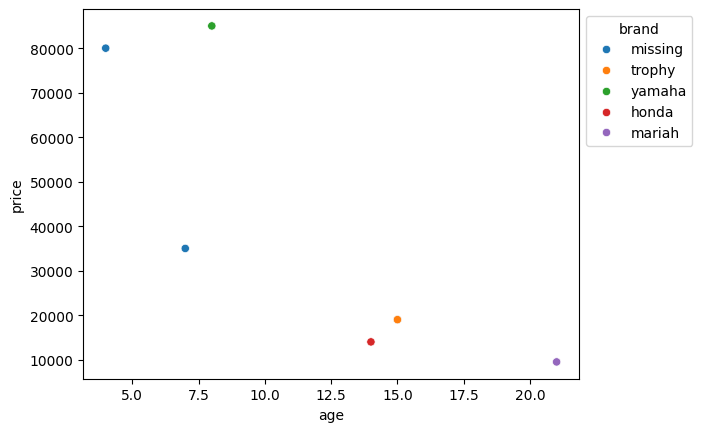

<Figure size 640x480 with 0 Axes>

In [5]:
# QUESTION 4:

import time # Time delays
import random # Random numbers

links = df['link']
data = []
for link in links: # about 3 minutes
    time.sleep(random.randint(1, 3)) # Random delays
    raw = requests.get(link,headers=header) # Get page
    bsObj = soup(raw.content,'html.parser') # Parse the html
    #
    try:
        year_post = bsObj.find(class_='attr important').find(class_ = 'valu year').get_text()
    except:
        year_post = np.nan
    #
    try:
        condition = bsObj.find(class_='attr condition').find(href=True).get_text()
    except:
        condition = 'missing'
    #
    try:
        cylinders = bsObj.find(class_='attr auto_cylinders').find(class_ = 'valu').get_text()
        cylinders = cylinders.replace('\n','')
    except:
        cylinders = 'missing'
    #
    try:
        drivetrain = bsObj.find(class_='attr auto_drivetrain').find(href=True).get_text()
    except:
        drivetrain = 'missing'
    #
    try:
        fuel = bsObj.find(class_='attr auto_fuel_type').find(href = True).get_text()
    except:
        fuel = 'missing'
    #
    try:
        miles = bsObj.find(class_='attr auto_miles').find(class_ = 'valu').get_text()
    except:
        miles = np.nan
    #
    try:
        color = bsObj.find(class_='attr auto_paint').find(href=True).get_text()
    except:
        color='missing'
    #
    try:
        title = bsObj.find(class_='attr auto_title_status').find(href=True).get_text()
    except:
        title='missing'
    #
    try:
        transmission = bsObj.find(class_='attr auto_transmission').find(href=True).get_text()
    except:
        transmission = 'missing'
    #
    try:
        bodytype = bsObj.find(class_='attr auto_bodytype').find(href=True).get_text()
    except:
        bodytype = 'missing'
    #
    text = bsObj.find(id='postingbody').get_text()
    text = text.replace('\n','')
    text = text.replace('QR Code Link to This Post','')
    record = {'title':title,
              'name':bodytype,
              'text':text,}
    data.append(record)

    new_df = pd.DataFrame.from_dict(data)
new_df.head()

df = pd.concat([df,new_df],axis=1) # combine data frames
print( df.head() )
print(df.columns.tolist())

df['age'] = pd.to_numeric(df['age'],errors='coerce')

df['year'] = pd.to_numeric(df['year'],errors='coerce')
df.to_csv('craiglist_cville_boats_long.csv')

ax = sns.scatterplot(data=df, x='age', y='price',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()
plt.savefig( "age_price_brand_new.png" )